In [132]:
import pandas as pd
import numpy as np
import prepare as p
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [133]:
df= p.acquire()

In [134]:
df= p.prep(df)

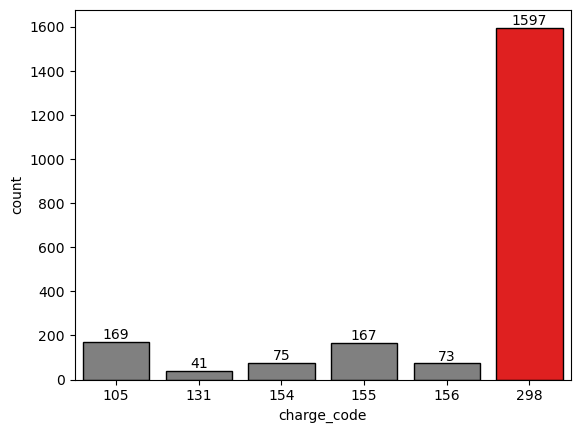

In [139]:
color= ['grey', 'grey', 'grey', 'grey', 'grey', 'red']
ax = sns.countplot(x='charge_code',
                 data= cc_df ,palette= color,
                 ec= 'black')
for i in ax.containers:
        ax.bar_label(i,)

In [141]:
df['bad_resident'] = df['charge_code'].isin(cc)
df['bad_resident'] = np.where(df.bad_resident == True, 1, 0)

In [142]:
df = df.drop_duplicates(subset = ['id', 'bad_resident'])

In [143]:
#Filter by bad resident
df_bad = df[df['bad_resident'] == 1]

# Get the indices of users who only have 0 status
idx_0 = df[~df['id'].isin(df_bad['id'])].index

# Filter rows based on 0 status for users who only have 0 status
df_0 = df.loc[idx_0]

# Combine the 1 and 0 dataframes
df_combined = pd.concat([df_bad, df_0])

# Sort by id to get the final result
df = df_combined.sort_values('id')

In [135]:
cc= [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [138]:
cc_df = df[df.charge_code.isin(cc)]